In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/PL_player_1920.csv')
df = data.iloc[:,1:]

## position 

In [3]:
def position_class(pos):
    position = list()
    for i in pos:
        if 'FW' in i:
            if ('AM' in i) or ('M' in i):
                position.append('AM/FW')
            else:
                position.append('FW')
        elif 'AM' in i:
            position.append('AM')
        elif 'M' in i:
            if 'D' in i:
                position.append('DM/WB')
            else :  position.append('M')
        elif 'D' in i:
            position.append('D')
        elif 'GK' in i:
            position.append('GK')
        else :
            position.append('??')
    return(position)

In [4]:
df.position=position_class(data.position)
df['goal_assist'] = df['Goals'] + df['Assists']

In [5]:
df = df.sort_values('position')

# PL"Son" 

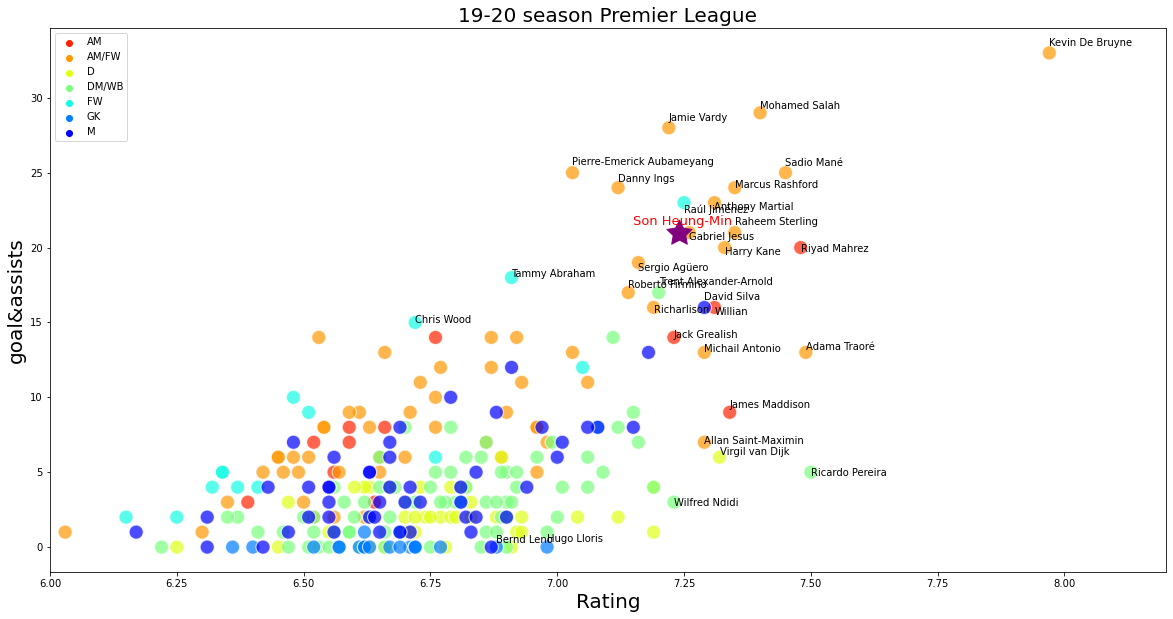

In [59]:
fig = plt.figure(figsize = (20,10))
sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', data=df, s=200, alpha=0.7)
for i in range(len(df['player_name'])):
    if df['player_name'][i] == 'Son Heung-Min':
        plt.text((df['Rating'][i]-0.09),(df['goal_assist'][i]+0.5),df['player_name'][i], color='red', 
                 fontsize = 13)
    elif df['player_name'][i] in ['Willian', 'Gabriel Jesus','Anthony Martial','Harry Kane']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]-0.5),df['player_name'][i])
    elif df['player_name'][i] in ['Raheem Sterling', 'Trent Alexander-Arnold', 'David Silva']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+0.5),df['player_name'][i])
    elif (df['goal_assist'][i] >= 15) or (df['Rating'][i]>7.2): 
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
    elif (df['position'][i]=='GK') and (df['Rating'][i]>6.8):
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
temp = df[df['player_name']=='Son Heung-Min']
plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=700, color='purple')
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylabel('goal&assists',fontsize=20)
plt.xlabel('Rating',fontsize=20)
fig.savefig('son_19_20_PL.png')

# "Son" (AM/FW)

In [8]:
df_am = df[df['position'].isin(['AM','AM/FW','FW'])]

In [9]:
df_am

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,goal_assist
231,Harry Wilson,183,Bournemouth,24,AM,20,1654,0,0.5,18.5,...,1.1,0.7,0.4,0.4,0.0,0.4,0.7,0.1,0,7
182,Erik Lamela,30,Tottenham,29,AM,12,1212,1,0.7,21.6,...,1.0,1.0,0.3,1.2,0.0,0.4,0.8,0.1,0,3
12,Willian,15,Chelsea,33,AM,29,2605,7,2.1,39.9,...,1.7,1.3,0.6,0.5,0.0,0.2,0.8,0.0,0,16
214,Bernard,31,Everton,29,AM,15,1311,2,0.9,20.0,...,1.5,1.1,0.6,0.7,0.0,0.3,1.1,0.1,0,5
19,Jack Grealish,24,Aston Villa,26,AM,36,3234,6,2.5,38.1,...,1.9,0.8,0.6,0.9,0.0,0.3,0.6,0.3,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Dominic Solanke,183,Bournemouth,24,FW,17,1645,1,0.5,13.5,...,1.6,0.3,0.3,0.5,0.0,0.5,0.9,0.0,0,4
72,Tammy Abraham,15,Chelsea,24,FW,25,2221,3,0.6,12.0,...,2.2,0.2,0.2,0.5,0.0,0.8,0.3,0.1,1,18
38,Sébastien Haller,29,West Ham,27,FW,24,2263,1,0.8,24.0,...,1.9,0.7,0.3,1.4,0.0,0.8,0.8,0.2,0,8
274,Andre Gray,27,Watford,30,FW,7,747,0,0.4,6.5,...,1.3,0.2,0.0,0.4,0.0,0.1,0.1,0.0,0,2


In [14]:
df.sort_values(by='position')

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,goal_assist
231,Harry Wilson,183,Bournemouth,24,AM,20,1654,0,0.5,18.5,...,1.1,0.7,0.4,0.4,0.0,0.4,0.7,0.1,0,7
127,Harvey Barnes,14,Leicester,23,AM,24,2094,8,1.0,19.4,...,1.6,0.4,0.2,0.6,0.0,0.1,0.5,0.1,0,14
202,Trézéguet,24,Aston Villa,27,AM,20,1951,1,0.6,10.7,...,2.1,1.1,0.7,1.0,0.0,0.4,1.0,0.1,0,7
172,Stuart Armstrong,18,Southampton,29,AM,19,1716,3,0.6,19.3,...,1.8,1.1,0.4,0.8,0.0,0.7,1.0,0.1,0,8
258,Dennis Praet,14,Leicester,27,AM,12,1135,2,0.3,19.3,...,1.0,1.2,0.6,0.7,0.0,0.4,0.7,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Dani Ceballos,13,Arsenal,25,M,18,1699,2,1.2,52.1,...,1.0,1.9,1.3,0.8,0.0,0.5,1.8,0.1,0,2
98,Ross Barkley,15,Chelsea,27,M,13,1104,4,1.1,29.4,...,1.2,0.8,0.3,0.4,0.0,0.3,0.6,0.1,0,5
87,Youri Tielemans,14,Leicester,24,M,32,2834,6,1.5,48.1,...,1.3,1.4,0.6,0.9,0.0,0.3,1.4,0.1,0,9
136,Moussa Sissoko,30,Tottenham,32,M,28,2455,1,0.6,43.0,...,1.3,1.3,0.9,1.5,0.1,1.2,1.0,0.1,0,3


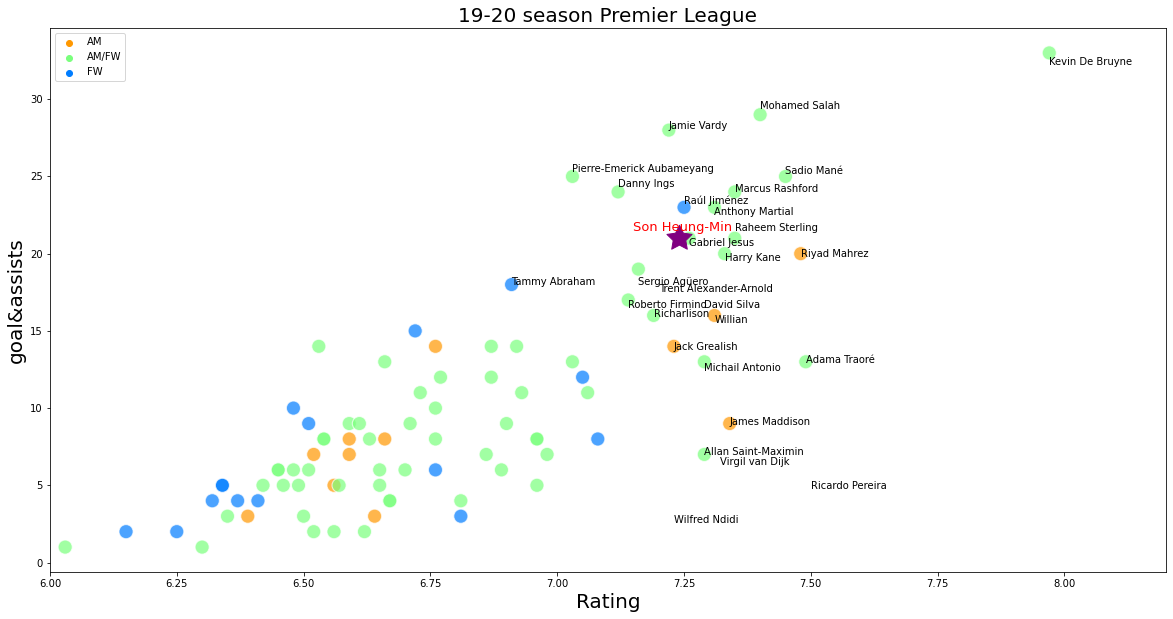

In [58]:
fig = plt.figure(figsize = (20,10))
sns.scatterplot(x='Rating', y='goal_assist', 
                hue='position', palette = 'jet_r', 
                data=df_am.sort_values(by = 'position'), s=200, alpha=0.7)
for i in range(len(df_am['player_name'])):
    if df['player_name'][i] == 'Son Heung-Min':
        plt.text((df['Rating'][i]-0.09),(df['goal_assist'][i]+0.5),df['player_name'][i], color='red', 
                 fontsize = 13)
    elif df['player_name'][i] in ['Willian', 'Gabriel Jesus','Anthony Martial','Harry Kane']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]-0.5),df['player_name'][i])
    elif df['player_name'][i] in ['Raheem Sterling', 'Trent Alexander-Arnold', 'David Silva']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+0.5),df['player_name'][i])
    elif (df['goal_assist'][i] >= 15) or (df['Rating'][i]>7.2): 
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
temp = df[df['player_name']=='Son Heung-Min']
plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=700, color='purple')
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylabel('goal&assists',fontsize=20)
plt.xlabel('Rating',fontsize=20)

In [63]:
set(list(df['position'])) 

{'AM', 'AM/FW', 'D', 'DM/WB', 'FW', 'GK', 'M'}

In [20]:
forward = ['AM', 'AM/FW', 'FW']

In [62]:
def plot_player(df, position_list, title):
    df.position = position_class(df.position)
    df['goal_assist'] = df['Goals'] + df['Assists']
    df = df[df.position.isin(position_list)]
    fig = plt.figure(figsize = (20,20))
    sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', 
                    data=df.sort_values(by = 'position'), s=400, alpha=0.7)
    for i in range(len(df['player_name'])):
        if (df['player_name'].iloc[i] == 'Son Heung-Min'):
            plt.text((df['Rating'].iloc[i]),
                     (df['goal_assist'].iloc[i] + np.random.normal(0,0.35)),
                     df['player_name'].iloc[i], color = 'red')
        elif (df['goal_assist'].iloc[i] >= 15) or (df['Rating'].iloc[i] > 7.2): 
            plt.text((df['Rating'].iloc[i]),
                     (df['goal_assist'].iloc[i] + np.random.normal(0,0.35)),
                     df['player_name'].iloc[i])
    temp = df[df['player_name'] == 'Son Heung-Min']
    plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=1000, color='purple')
    plt.title(title, fontsize=20)
    plt.legend(loc='upper left')
    plt.xlim(6,8.2)
    plt.ylabel('goal&assists',fontsize=20)
    plt.xlabel('Rating',fontsize=20)
    fig.savefig(str(title) + '.png')

In [63]:
data_1516 = pd.read_csv('./data/PL_player_1516.csv')
data_1617 = pd.read_csv('./data/PL_player_1617.csv')
data_1718 = pd.read_csv('./data/PL_player_1718.csv')
data_1819 = pd.read_csv('./data/PL_player_1819.csv')
data_2021 = pd.read_csv('./data/PL_player_2021.csv')

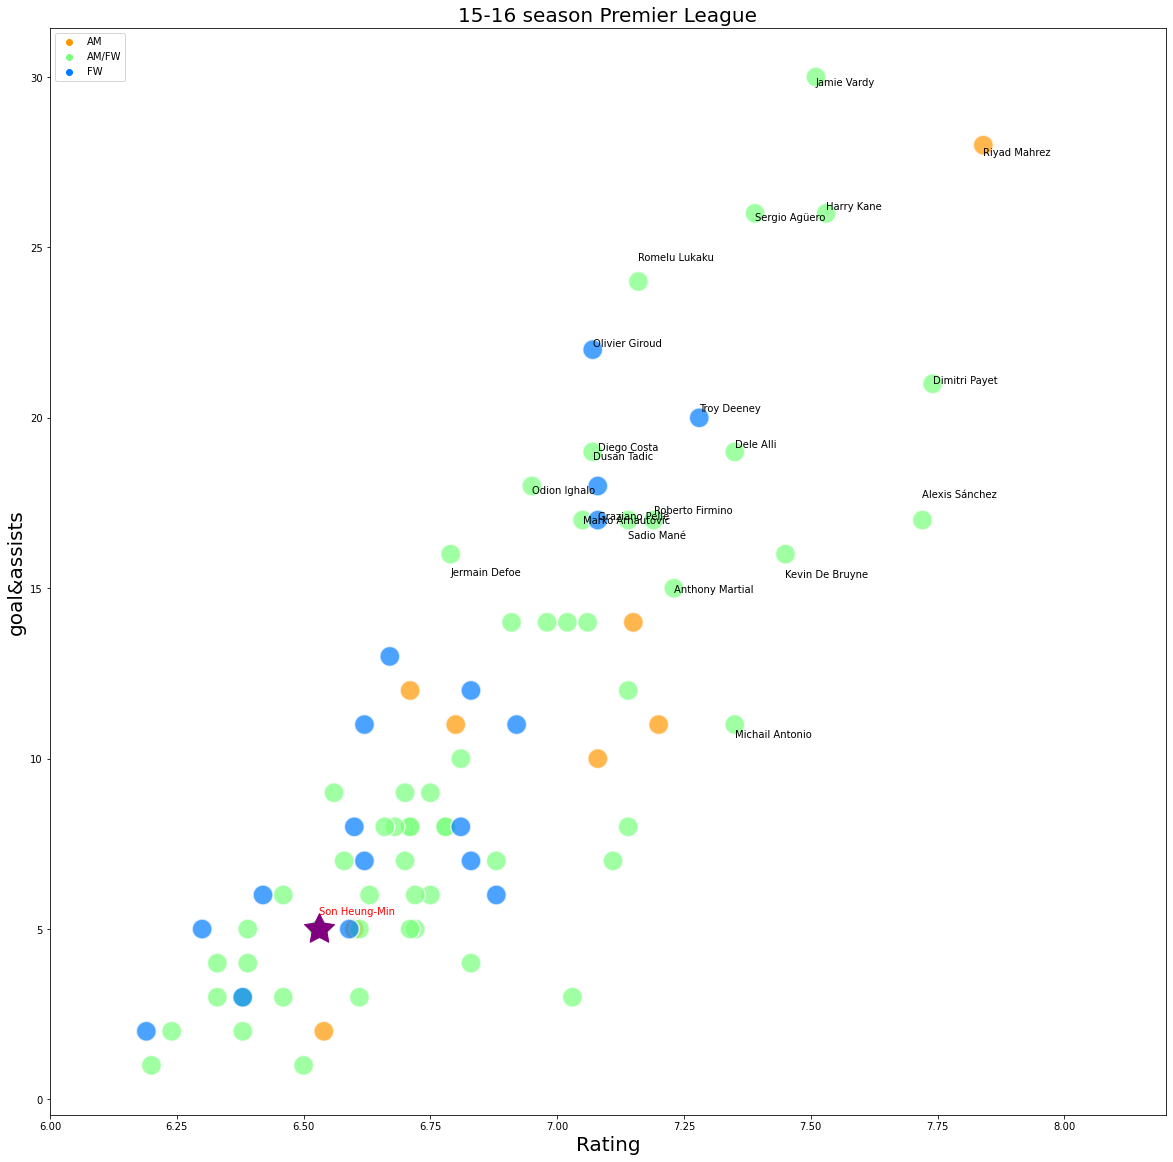

In [66]:
plot_player(data_1516, forward, '15-16 season Premier League')

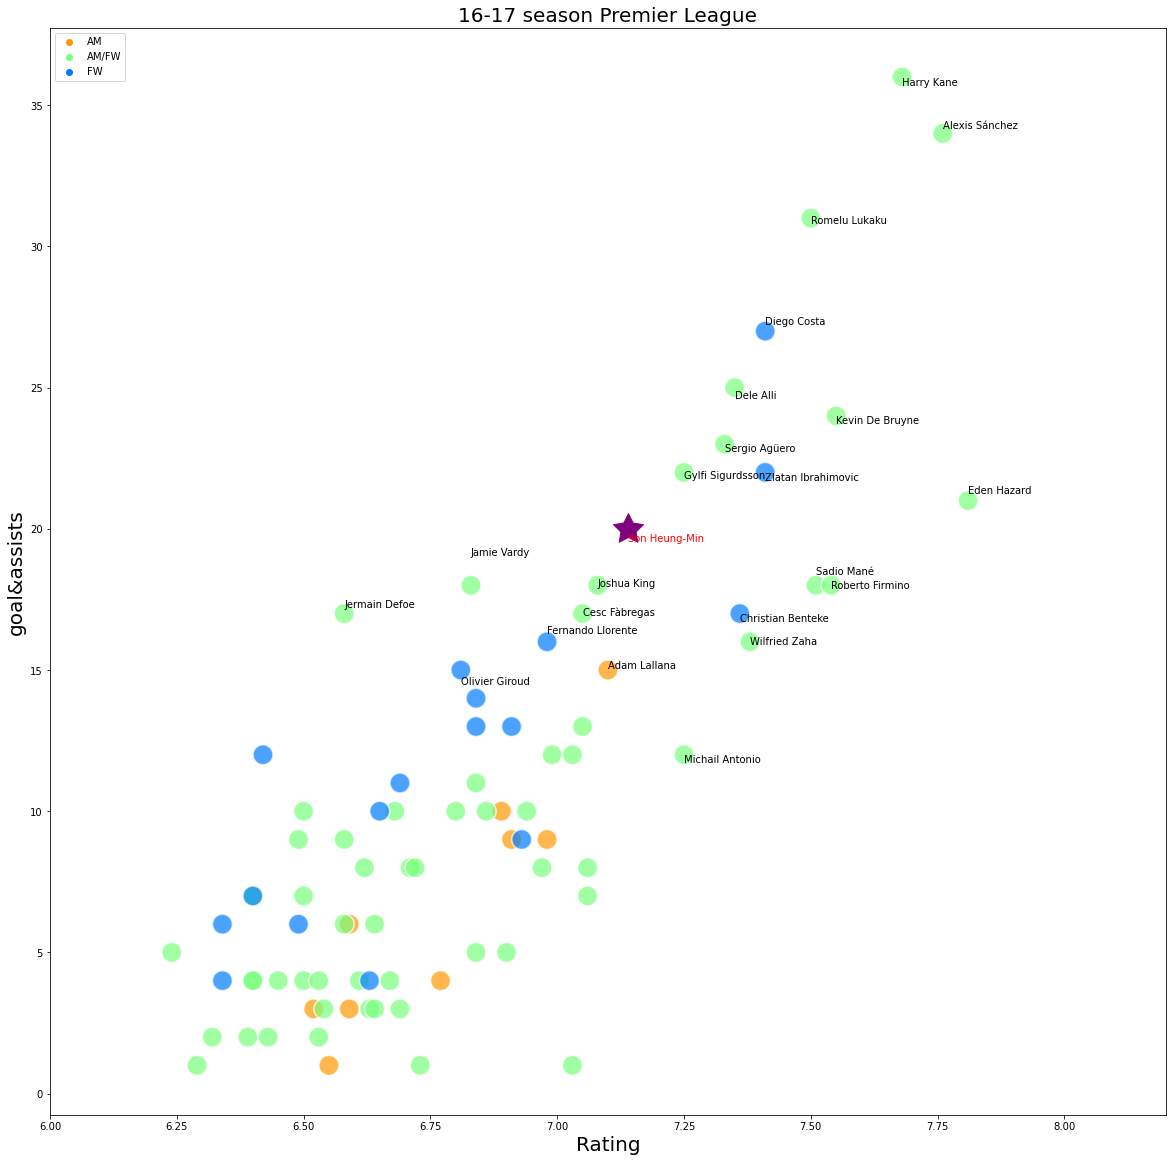

In [68]:
plot_player(data_1617, forward, '16-17 season Premier League')

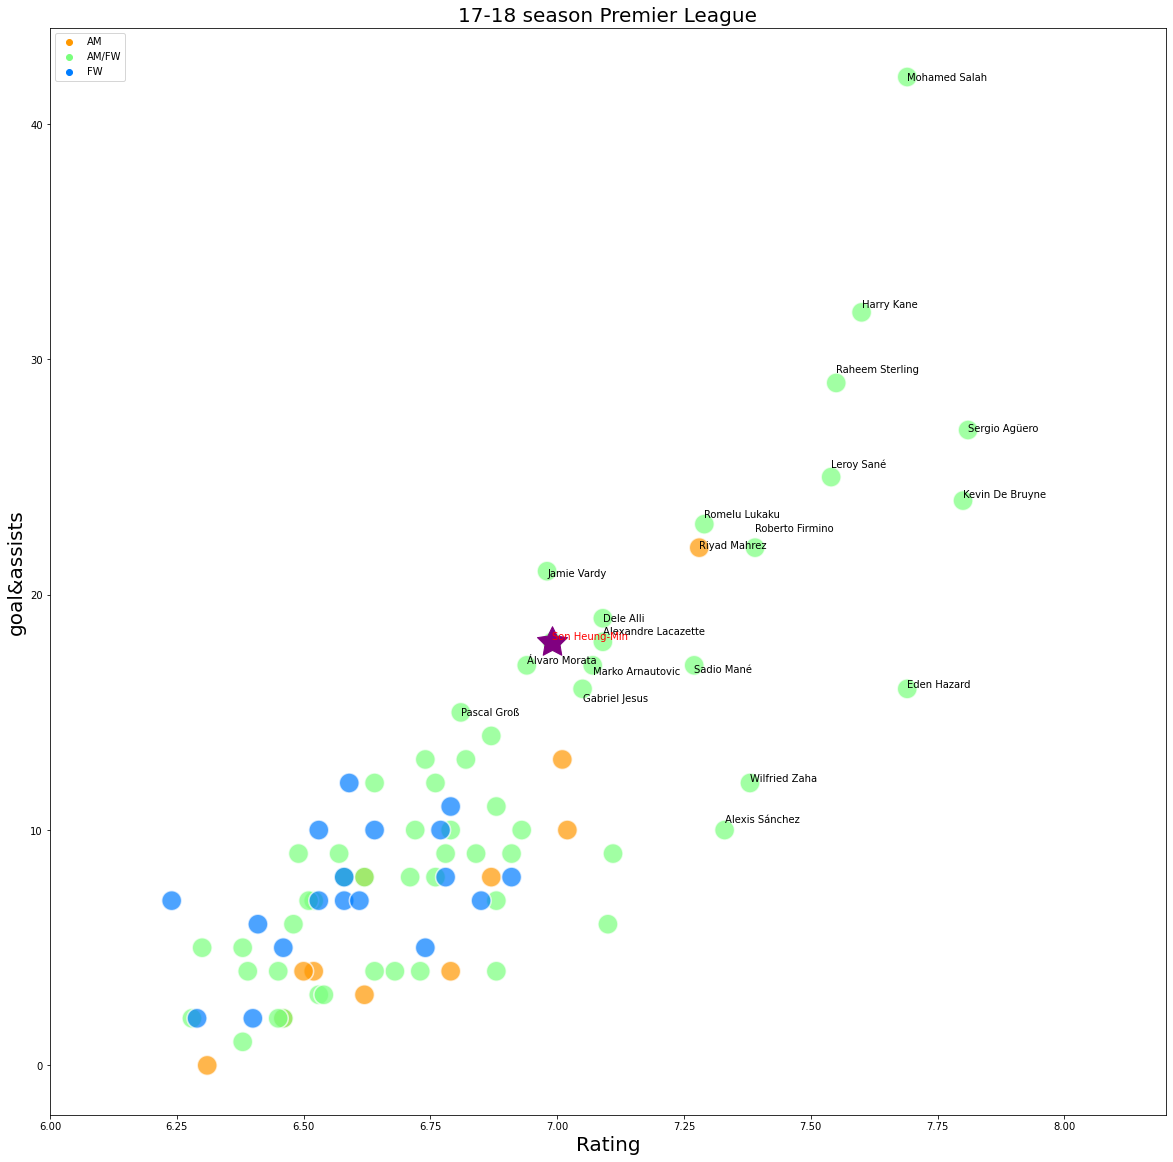

In [72]:
plot_player(data_1718, forward, '17-18 season Premier League')

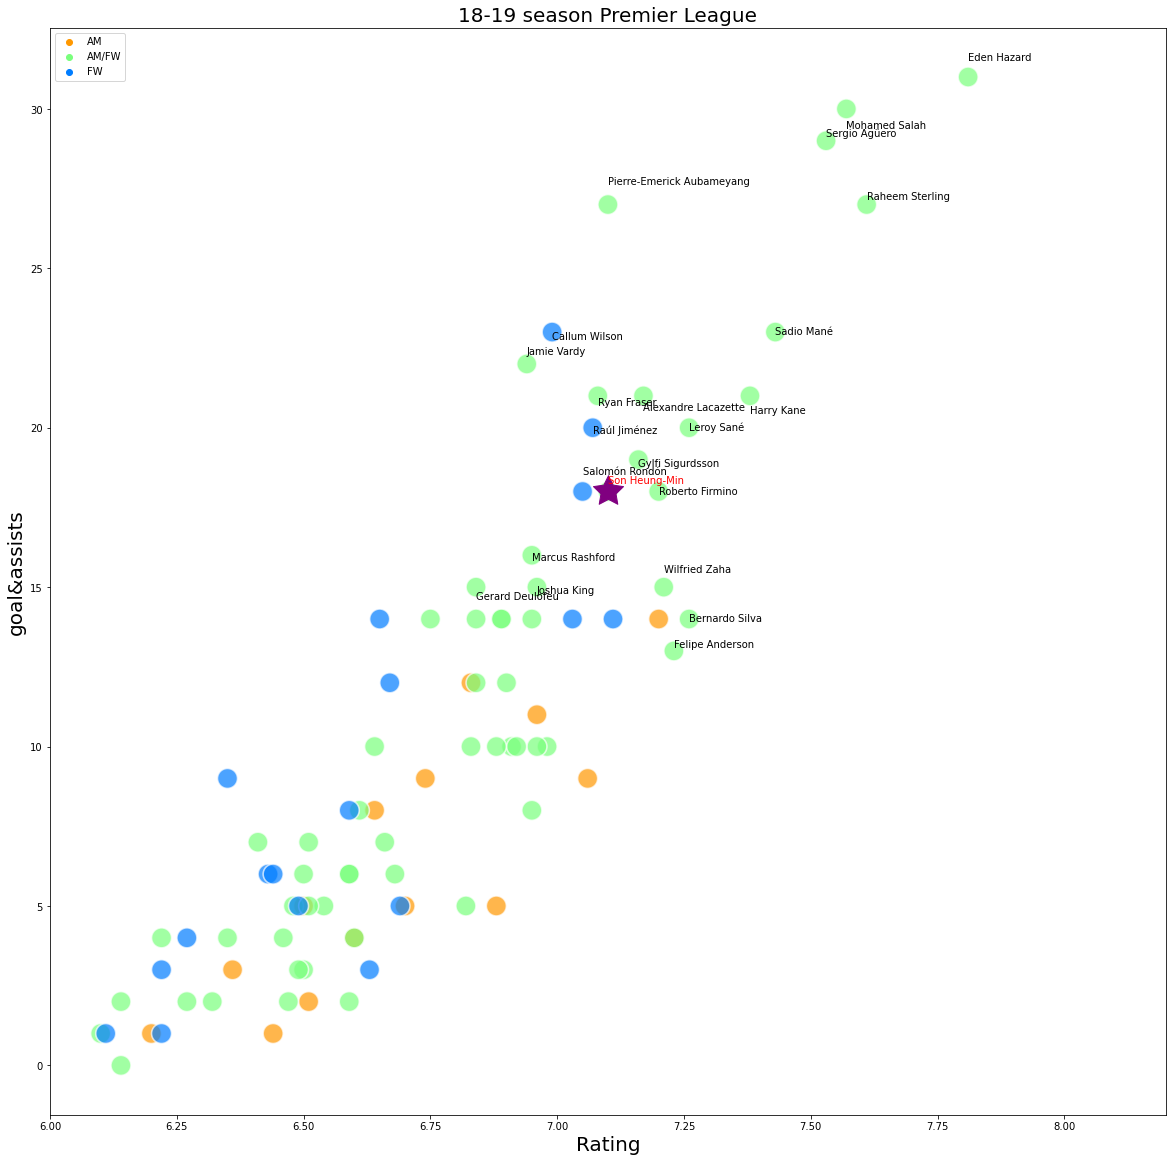

In [75]:
plot_player(data_1819, forward, '18-19 season Premier League')

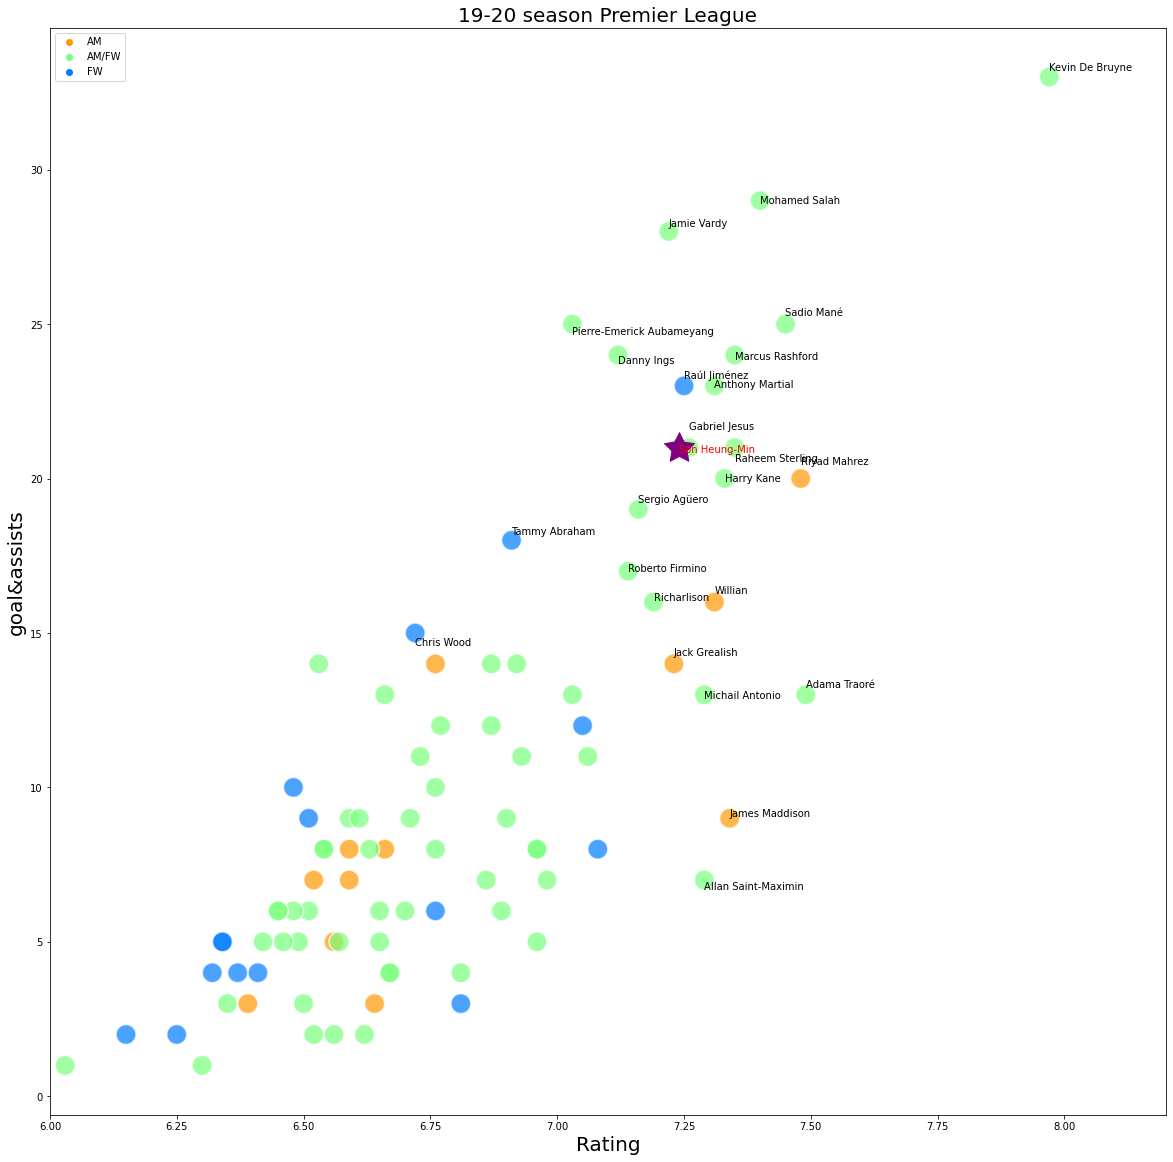

In [76]:
plot_player(df, forward, '19-20 season Premier League')

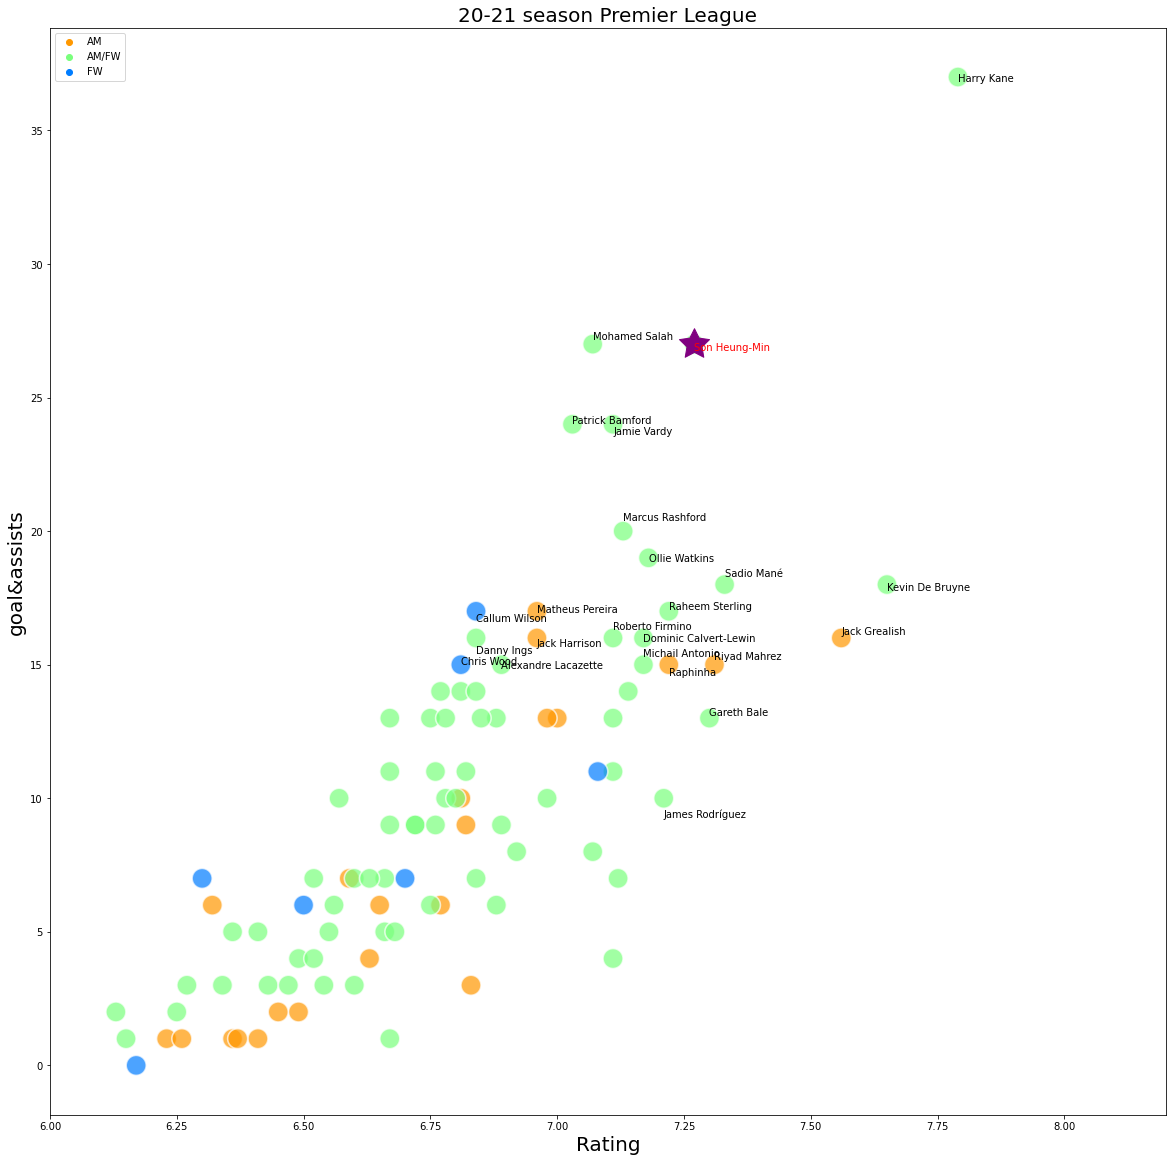

In [81]:
plot_player(data_2021, forward, '20-21 season Premier League')

# linear regression

In [82]:
from sklearn.linear_model import LinearRegression

In [126]:
df_ = data_2021.iloc[:, 1:]
df_am = df_[df_['position'].isin(['AM', 'AM/FW', 'FW'])]
df_am = df_am.sort_values(by = 'position')

In [127]:
X = df_am['Rating']
y = df_am['goal_assist']

In [128]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1,1),y)

LinearRegression()

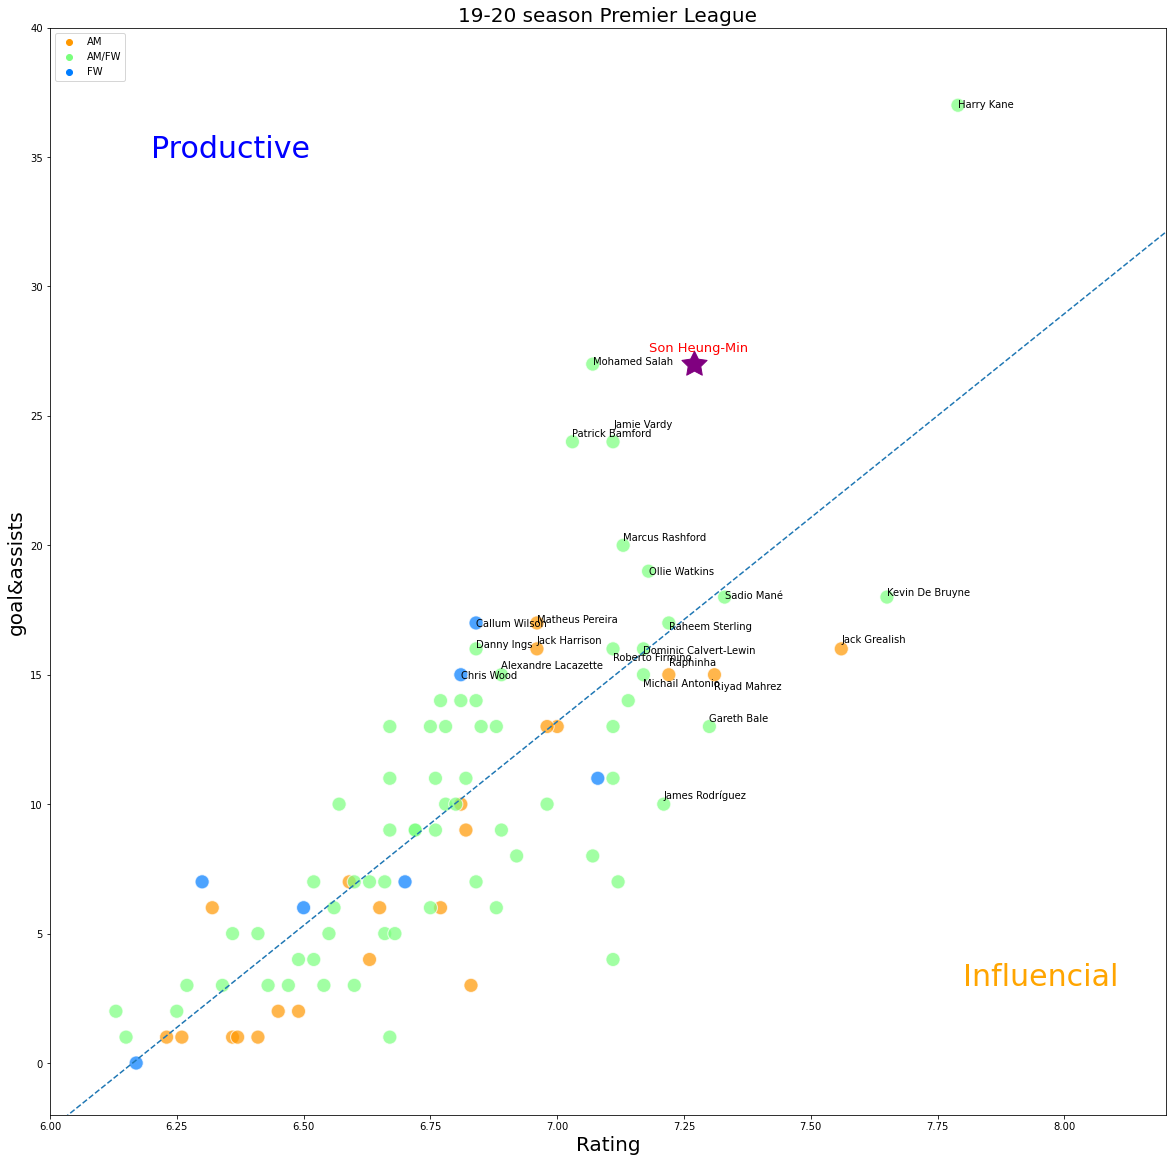

In [138]:
fig = plt.figure(figsize = (20,20))
sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', data=df_am, s=200, alpha=0.7)
for i in range(len(df_am['player_name'])):
    if df_am['player_name'].iloc[i] == 'Son Heung-Min':
        plt.text((df_am['Rating'].iloc[i]-0.09),(df_am['goal_assist'].iloc[i]+0.5),
                 df_am['player_name'].iloc[i], color='red',fontsize = 13)
    elif (df_am['goal_assist'].iloc[i] >= 15) or (df_am['Rating'].iloc[i]>7.2): 
        plt.text((df_am['Rating'].iloc[i]),(df_am['goal_assist'].iloc[i]+np.random.normal(0,0.35)),
                 df_am['player_name'].iloc[i])
temp = df_am[df_am['player_name']=='Son Heung-Min']
plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=700, color='purple')
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylim(-2, 40)
plt.plot(lr.coef_ * np.arange(0,10) + lr.intercept_, linestyle='--')
plt.ylabel('goal&assists',fontsize=20)
plt.xlabel('Rating',fontsize=20)
plt.text(6.2, 35, 'Productive', fontsize=30, color='blue')
plt.text(7.8, 3, 'Influencial', fontsize=30, color='orange')
fig.savefig('son_2021_PL.png')